# Introduction

<center><img src="https://www.gov.br/secretariageral/pt-br/noticias/2017/junho/imagens/tele.jpg" height=400></center>


This Exploratory analysis aims to find relevant insights on customer churn at a telecom company.

Customer Churn is defined as the metrics of the customers that cancelled a service after some period of time. 

It is considered an important analysis to raise better strategies to improve the relationship and build loyalty to service.

# Import Statements

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Initial Exploration

In [23]:
#Viz setup
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (8, 5)

#Loading dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing and Cleaning

In [25]:
# Check missing values
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
#Convert totalcharges column to numeric, coercing errors to NaN
df['totalcharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [27]:
# Drop rows where TotalCharges is missing
df = df.dropna(subset=["TotalCharges"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
# Map target variable to binary (Yes = 1, No = 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Exploratory Data Analysis (EDA)

In [30]:
# Churn rate
churn_rate = df["Churn"].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# General statistics
df.describe(include="all").T.head(10)


Churn Rate: 26.54%


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


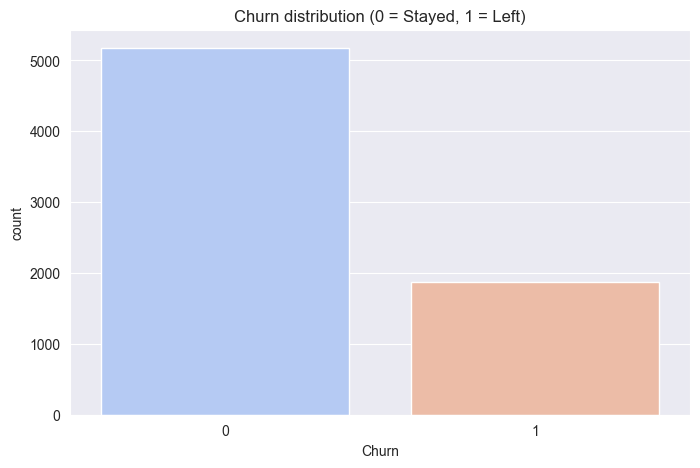

The percentage of customers who churned is 26.54%


In [31]:
sns.countplot(x="Churn", hue="Churn", data=df, palette="coolwarm", legend=False)
plt.title("Churn distribution (0 = Stayed, 1 = Left)")
plt.show()

print('The percentage of customers who churned is {:.2f}%'.format(df['Churn'].mean()*100))


## Factors that contributed to customer churn

### Churn and contract type

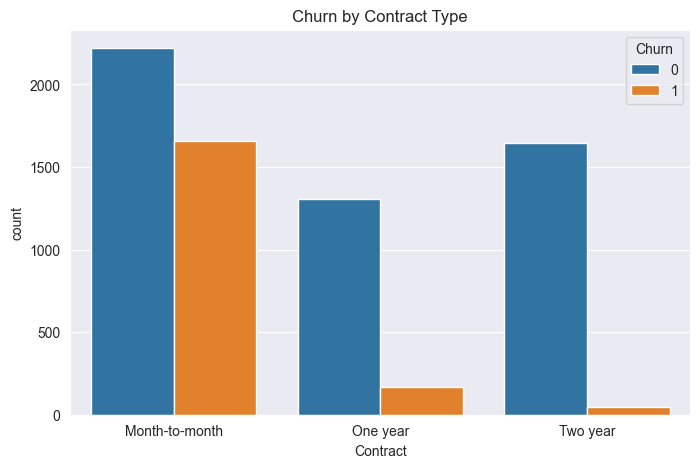

In [32]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()


In [33]:
print('The percentage of customers with month-to-month contract who churned is {:.2f}%'.format(df[df['Contract']=='Month-to-month']['Churn'].mean()*100))
print('The percentage of customers with one year contract who churned is {:.2f}%'.format(df[df['Contract']=='One year']['Churn'].mean()*100))
print('The percentage of customers with two year contract who churned is {:.2f}%'.format(df[df['Contract']=='Two year']['Churn'].mean()*100))

The percentage of customers with month-to-month contract who churned is 42.71%
The percentage of customers with one year contract who churned is 11.27%
The percentage of customers with two year contract who churned is 2.83%


It is notable the low rate of churn on customer with longer term contracts.

### Churn and payment method

The customers with electronic type of payment method were the highest rate of churn, while the automatic payments became the lowest rate of churn.


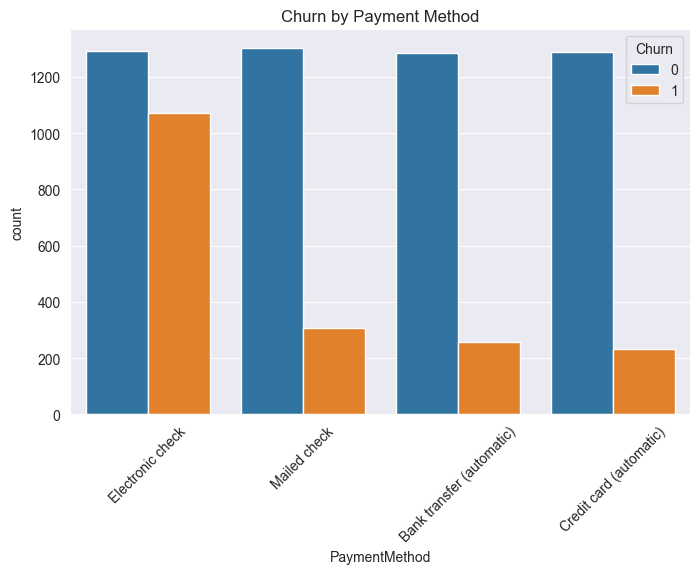

In [34]:
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

### Churn and internet service


Churn rate was considerably lower on customers without internet service compared to the other two.

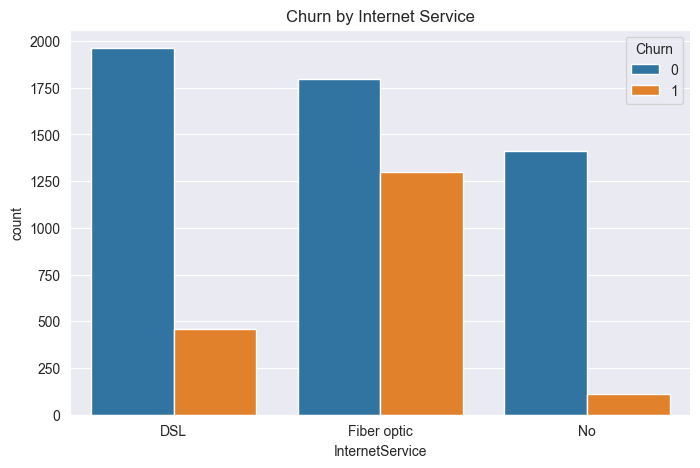

In [35]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()


### Tenure distribution by churn

Tenure refers to time (in months) a customer remained in the service.

The chart shows that the largest amount of customers that cancelled their services were whom stayed in for a considerable smaller amount of time, with median of 10 months of tenure, compared to a median of 38 months on the customers who stayed loyal.

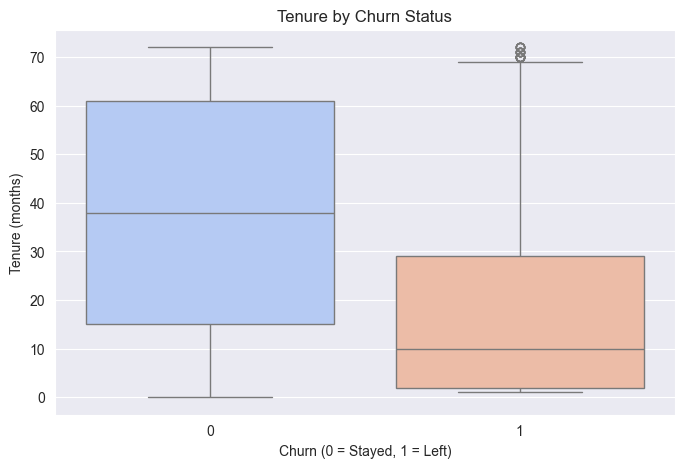

In [36]:
sns.boxplot(x="Churn", y="tenure", hue="Churn", data=df, palette="coolwarm", legend=False)
plt.title("Tenure by Churn Status")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Tenure (months)")
plt.show()


In [37]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation between numeric variables")
plt.show()


ValueError: could not convert string to float: ' '